In [1]:
import gensim.downloader as api

#load Google's pre-trained Word2Vec model.
model = api.load('word2vec-google-news-300')

Function to find the most similar words related to our pre-defined set of keywords

In [2]:
def find_similar_keywords(keyword, threshold=0.6):
    similar_keywords = []
    
    if keyword in model:
        # find the most similar words to the keyword
        top_similar = model.most_similar(keyword)
        
        for word, similarity in top_similar:
            if similarity >= threshold:
                similar_keywords.append(word)
                
    return similar_keywords

Pre-defined set of keywords

In [3]:
security_keywords = ["secure", "password", "hack", "breach", "malware", "virus", "phishing", "encrypt"]
print("Length of initial keywords: ",len(security_keywords))

Length of initial keywords:  8


Get an updated list of secuity related keywords

In [4]:
security_related_keywords = set(security_keywords)  # initialize with the original keywords

for keyword in security_keywords:
    similar_keywords = find_similar_keywords(keyword)
    security_related_keywords.update(similar_keywords)

# convert the set back to a list
security_related_keywords = list(security_related_keywords)
print("Updated Security-related keywords:", security_related_keywords)
print("Uodated length of secuirty keywords: ",  len(security_related_keywords))

Updated Security-related keywords: ['Malware', 'passphrases', 'phising', 'passphrase', 'Encrypt', 'logon_credentials', 'Encrypted', 'secured', 'Passwords', 'securing', 'login', 'antivirus_software', 'trojans', 'encrypted', 'encrypting', 'phishing_scams', 'hack', 'swine_flu_virus', 'hacks', 'H#N#', 'Phishing', 'breaching', 'virus', 'phishing_e_mails', 'breached', 'viruses', 'breaches', 'hacker', 'rootkits', 'passcodes', 'hacking', 'influenza_virus', 'avian_flu_virus', 'encrypts', 'malware', 'antivirus', 'infection', 'breach', 'Password', 'password', 'hacked', 'phishing', 'violation', 'flu_virus', 'trojan', 'secure', 'passwords', 'Virus', 'bird_flu_virus', 'malicious_code', 'spyware', 'H#N#_virus', 'phish', 'Encrypting', 'phishing_schemes', 'Encryption', 'crimeware', 'unencrypted', 'encryption', 'phishing_emails', 'phishers', 'encrypt_sensitive', 'hackers', 'username_password', 'phishing_attacks', 'malcode', 'Breaches', 'encrypt', 'logon']
Uodated length of secuirty keywords:  69


In [5]:
import pandas as pd

Data Collection

In [6]:
df = pd.read_csv('mobilerec_final.csv')
display(df.head(5))

,app_package,review,rating,votes,date,uid,formated_date,unix_timestamp,app_category
0,com.cleverapps.heroes,It's really a fun game,5,1,"October 21, 2018",shqoc6X1fcJRLEmx,2018-10-21,1.540094e+09,Casual
1,com.bodyfast,uninstalling. it was ok but felt like it was c...,2,0,"January 18, 2019",shqoc6X1fcJRLEmx,2019-01-18,1.547788e+09,Health & Fitness
2,com.thrivegames.wordshapes,Love this game,4,1,"January 16, 2021",shqoc6X1fcJRLEmx,2021-01-16,1.610773e+09,Word
3,com.affinity.rewarded_play,Doesn't update play time. Just downloaded it 3...,1,1,"November 4, 2021",shqoc6X1fcJRLEmx,2021-11-04,1.635998e+09,Entertainment
4,dating.inmessage.net,app crashes every time I try to log in. what g...,1,0,"November 24, 2021",shqoc6X1fcJRLEmx,2021-11-24,1.637730e+09,Dating


Considering time and space complextiing, using 500000 dataset from the original dataset

In [7]:
df = df.sample(n=500000, random_state=42)

**Data Cleaning**


>Firstly, we are cleaning the dataframe by removing the rows with NaN values in the reviews column

> Then, we are removing stopwords from the reviews. We are removing them because they don't add any additional meaning to the text. So we can remove them to have cleaner text. This is usually necessary for NLP approaches, for instance, when we use text based sentiment analysis approach.

> We also removed special characters, url, html tags, converted all word to lower case.

In [8]:
# Filter out rows with non-string values in the 'review' column
df = df.dropna(subset=['review'])
df = df[df['review'].apply(lambda x: isinstance(x, str))]

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords and wordnet data
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_review(text):
    text = text.lower()

    # remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # remove stopwords, lemmatize and remove short length words
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 3]

    text = ' '.join(words)

    return text

# apply the cleaning function to the reviews
df['cleaned_review'] = df['review'].apply(clean_review)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


 **Filtering Review**


> We filter reviews to isolate those that contain the identified keywords, which are likely to express concerns regarding app security and privacy.

In [10]:
# filter the reviews containing the listed tokens or keywords
filtered_reviews = df[df['review'].str.contains('|'.join(security_related_keywords), case=False, na=False)]

display(filtered_reviews.head(5))

,app_package,review,rating,votes,date,uid,formated_date,unix_timestamp,app_category,cleaned_review
13392102,com.nike.ntc,"Overall good experience, since you have access...",3,13,"September 19, 2019",VmTL02CaNxWMzpCw,2019-09-19,1.568866e+09,Health & Fitness,overall good experience since access good cont...
15498805,de.fastic.app,"Had to install it twice, because with my first...",4,0,"January 15, 2022",qPHUkn69jW3rbYs8,2022-01-15,1.642223e+09,Health & Fitness,install twice first email address gmail wouldn...
10589777,com.nike.omega,My problem is that the app will notify me of t...,1,8,"September 12, 2020",s6d9uRSAqsCezNcO,2020-09-12,1.599883e+09,Shopping,problem notify shoe come time sudden cant logg...
3206269,com.opera.gx,Great but Lacking Features I love it so far an...,3,1,"July 10, 2021",ohHWn0MBcZ6vAuP7,2021-07-10,1.625890e+09,Communication,great lacking feature love flow feature super ...
15584802,com.chase.sig.android,"Looks clean, but could use some work. I've put...",3,0,"December 10, 2018",jpAOErZAiY3SW5bo,2018-12-10,1.544418e+09,Finance,look clean could work fingerprint unlocking fe...


In [11]:
print(filtered_reviews.shape)

(7317, 10)


            rating        votes  unix_timestamp
count  7317.000000  7317.000000    7.317000e+03
mean      2.395791    16.181085    1.604140e+09
std       1.480130    88.449442    4.097190e+07
min       1.000000     0.000000    1.362974e+09
25%       1.000000     0.000000    1.578805e+09
50%       2.000000     1.000000    1.613970e+09
75%       4.000000     6.000000    1.638940e+09
max       5.000000  2610.000000    1.649390e+09


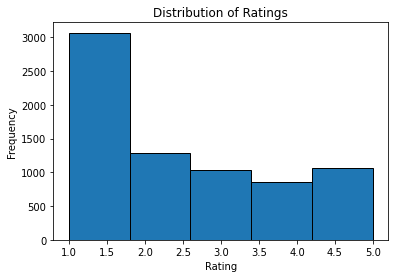

In [12]:
print(filtered_reviews.describe())

#histogram of ratings
import matplotlib.pyplot as plt
plt.hist(filtered_reviews['rating'], bins=5, edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [13]:
data = filtered_reviews[["review","rating","app_category","votes"]]
positive = data[data["rating"] > 3]
negative = data[data["rating"] <= 3]

print("Shape of positive rating reviews:", positive.shape)
pd.set_option('max_colwidth',None)
display(positive.head(5))

Shape of positive rating reviews: (1929, 4)


,review,rating,app_category,votes
15498805,"Had to install it twice, because with my first email address (Gmail) the app wouldn't let me sign in, even after resetting the password twice and reinstalling the app. Now the app works finde with another Gmail address. Weird, but I'm happy to track my fasting now.",4,Health & Fitness,0
9143750,I originally rated this game 2 stars because I felt like I had to pay to get anywhere. I still feel like there are to many games that are pay to win and this is not far off. Hutch though at least rewards you nicely with daily logins and wins. I'm hooked on top drives and this one is working it's way up on my play list.,4,Racing,5
7583277,me gustó mucho la mecánica de el juego pero sobretodo la historia es bastante buena les recomiendo leer las. conversaciones con madre y el virus.,5,Racing,0
1550262,Cannot login due connection lost,4,Card,2
5823716,My rating used to be a 5 star because I honestly love the app but I turned it into a 4 star because I loged out and it won't let me login again it keeps saying I got the wrong password even tho my password is correct and I also tried to change the password many times but it won't send the link to change my password to my email.,4,Simulation,0


In [14]:
print("Shape of negative rating reviews:", negative.shape)
display(negative.head(5))

Shape of negative rating reviews: (5388, 4)


,review,rating,app_category,votes
13392102,"Overall good experience, since you have access to a lot of good content for free, but I have some complaints: first is about other party apps integration, specially with Spotify and Nike run, second is about the fact that when you don't have a internet connection, your current plan won't show in the plan page, it seems as if you're entering a site and you need to login, this stuff should be preloaded. Also, I've experienced some bugs during workouts. Gotta stop here 'cause of the typing limit.",3,Health & Fitness,13
10589777,"My problem is that the app will notify me of the shoes, but then when it comes time to buy them all of a sudden I can't get logged in and my username and password does not work. When I'm finally able to get in, the shoes are all sold out. This has happened more than once. I may as well go into the store to wait on them then downloading this HORRIBLE app.",1,Shopping,8
3206269,"Great but Lacking Features I love it so far and the Flow feature is super helpful but without the ability to sync my passwords and bookmarks from the pc version it feels hollow. There isn't even a bookmarks feature, only pinning to home or start screen.",3,Communication,1
15584802,"Looks clean, but could use some work. I've put in the fingerprint unlocking feature, but it doesn't attempt to open using it. I always have to enter my username and password and select to turn on the fingerprint unlock feature again each time.",3,Finance,0
2576562,"This would be great if only autofill worked with Samsung Internet, but no Bitwarden popup appears. Firefox does get the popup, but when I select the login details nothing gets filled. Very grateful if you could fix the app for these two browsers.",2,Productivity,2


A visualization to analyze the reviews to find whether they cause security concerns or not based on the user ratings and filtered review

<AxesSubplot:>

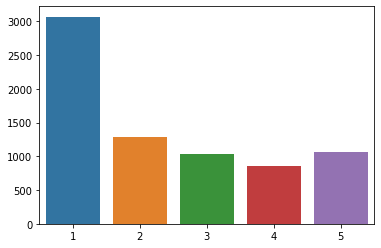

In [15]:
import seaborn as sns
sns.barplot(x=data.rating.value_counts().index, y=data.rating.value_counts().values)

The most vulnerable app category is `Finance`.

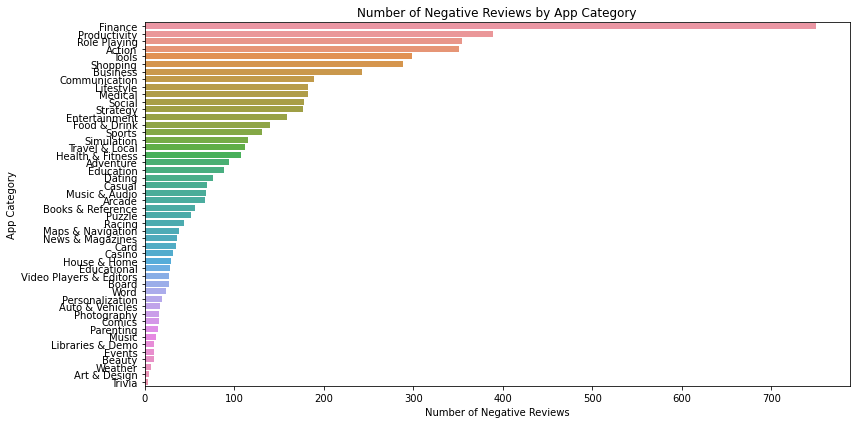

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(data=negative, y='app_category', order=negative['app_category'].value_counts().index)
plt.title('Number of Negative Reviews by App Category')
plt.xlabel('Number of Negative Reviews')
plt.ylabel('App Category')
plt.tight_layout()
plt.show()

App category having highest positive reviews is `Productivity`.

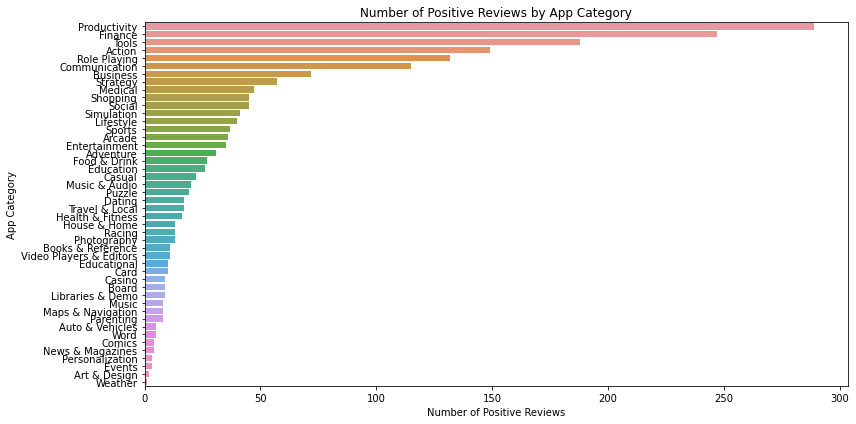

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(data=positive, y='app_category', order=positive['app_category'].value_counts().index)
plt.title('Number of Positive Reviews by App Category')
plt.xlabel('Number of Positive Reviews')
plt.ylabel('App Category')
plt.tight_layout()
plt.show()

All the categories have some positive or negative reviews

In [18]:
# Extract unique categories from both dataframes
positive_categories = set(positive['app_category'].unique())
negative_categories = set(negative['app_category'].unique())

print("Number of categories that have positive reviews :", len(positive_categories))
print("Number of categories that have negative reviews :", len(negative_categories))

# Find the intersection of the two sets
common_categories = positive_categories.intersection(negative_categories)

# Get the number of common categories
num_common_categories = len(common_categories)
print(f"Number of categories that have both positive and negative reviews: {num_common_categories}")


Number of categories that have positive reviews : 46
Number of categories that have negative reviews : 48
Number of categories that have both positive and negative reviews: 46


Graph to understand the number of security concerns per app category

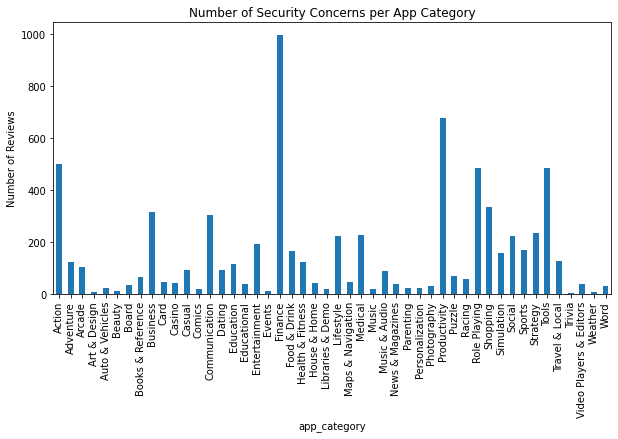

In [21]:
# Number of security concerns per app
security_reviews_count = filtered_reviews.groupby('app_category').size()
security_reviews_count.plot(kind='bar', figsize=(10, 5))
plt.title('Number of Security Concerns per App Category')
plt.ylabel('Number of Reviews')
plt.show()

A time series to get a glimpse of security concerns over time

C:\Users\Admin\AppData\Local\Temp/ipykernel_12728/930896588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_reviews['formated_date'] = pd.to_datetime(filtered_reviews['formated_date'])


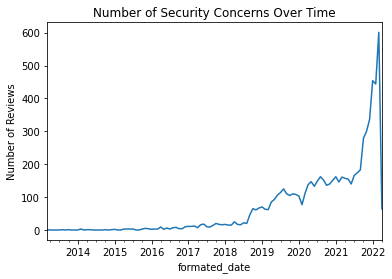

In [22]:
filtered_reviews['formated_date'] = pd.to_datetime(filtered_reviews['formated_date'])
filtered_reviews.set_index('formated_date', inplace=True)
filtered_reviews.resample('M').size().plot()
plt.title('Number of Security Concerns Over Time')
plt.ylabel('Number of Reviews')
plt.show()

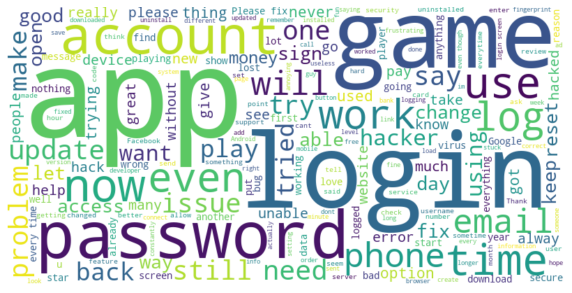

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_reviews = ' '.join(negative['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

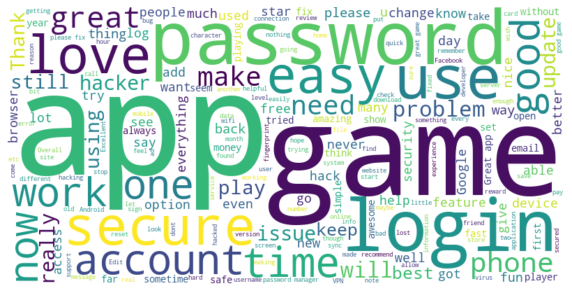

In [24]:
all_reviews = ' '.join(positive['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
df_copy = filtered_reviews.copy()

In [26]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df_copy['sentiment'] = df_copy['cleaned_review'].apply(get_sentiment)

In [28]:
negative_reviews = df_copy[df_copy['sentiment'] == 'Negative']
positive_reviews = df_copy[df_copy['sentiment'] == 'Positive']

In [29]:
print("Shape of negative rating reviews:", negative_reviews.shape)
display(negative_reviews.head(5))

Shape of negative rating reviews: (2481, 10)


,app_package,review,rating,votes,date,uid,unix_timestamp,app_category,cleaned_review,sentiment
formated_date,,,,,,,,,,
2020-09-12,com.nike.omega,"My problem is that the app will notify me of the shoes, but then when it comes time to buy them all of a sudden I can't get logged in and my username and password does not work. When I'm finally able to get in, the shoes are all sold out. This has happened more than once. I may as well go into the store to wait on them then downloading this HORRIBLE app.",1,8,"September 12, 2020",s6d9uRSAqsCezNcO,1.599883e+09,Shopping,problem notify shoe come time sudden cant logged username password work finally able shoe sold happened well store wait downloading horrible,Negative
2020-12-19,com.ezviz,"Cannot recconnect to my nvr since the last few days. Says user name or password incorrect. Looks like the app has been updated and trying to use the cloud. I dint need the cloud. Its for an internal network only. Can you please sort, so i can connect to my hikvision nvr please, without having to signup to the cloud. App was a 5+ star, dropped to a 1 star :( ‐-------------- Have had a reply back, totally useless, told to contact hikvision. When the cameras and nvr work fine.",1,4,"December 19, 2020",m6K4Q4Kftf8iSHyx,1.608354e+09,Video Players & Editors,cannot recconnect since last day say user name password incorrect look like updated trying cloud dint need cloud internal network please sort connect hikvision please without signup cloud star dropped star reply back totally useless told contact hikvision camera work fine,Negative
2021-03-15,com.masomo.basketballarena,CAPTAINCHEEKS and DFLORES01 FREGGICKLIOSO and BUCKTIMS who made me freeze for the whole game and there was NO ICE and more cheat in this game and they still win and something that knows when there cheating I lost many things from those idiots IDC ABOUT ANY PTHER HACKERS MRJBEANZ JUST MADE ME LOSE EVERYTHING HE TOOK AWWY ALL YM DIAMANDS COINS AND MY LEVEL,3,0,"March 15, 2021",jkNIECeXhWAKhawR,1.615781e+09,Sports,captaincheeks dflores freggicklioso bucktims made freeze whole game cheat game still something know cheating lost many thing idiot pther hacker mrjbeanz made lose everything took awwy diamands coin level,Negative
2019-06-01,com.madfingergames.monzo,i want to hack this game so can i hack this game,2,0,"June 1, 2019",VTSiDVoGLmUkGyqD,1.559362e+09,Simulation,want hack game hack game,Negative
2021-10-22,com.iherb,"I had a virus/someone hacked to my account and iherb did not help me resolve it, disappointing after all that I ordered from them, then they tell me here in the answers to email this and that, why don't you just answered my mails?? When I needed you back then?? It's top priority. Plus few last times my orders were delayed, emailed again they said someone will get back to me no one did, last time fir me with you. Lost-- All Yours lol",1,0,"October 22, 2021",qCdx9AlaYnGo976t,1.634875e+09,Shopping,virussomeone hacked account iherb help resolve disappointing ordered tell answer email dont answered mail needed back priority plus last time order delayed emailed said someone back last time lost,Negative


In [30]:
print("Shape of positive rating reviews:", positive_reviews.shape)
display(positive_reviews.head(5))

Shape of positive rating reviews: (3473, 10)


,app_package,review,rating,votes,date,uid,unix_timestamp,app_category,cleaned_review,sentiment
formated_date,,,,,,,,,,
2019-09-19,com.nike.ntc,"Overall good experience, since you have access to a lot of good content for free, but I have some complaints: first is about other party apps integration, specially with Spotify and Nike run, second is about the fact that when you don't have a internet connection, your current plan won't show in the plan page, it seems as if you're entering a site and you need to login, this stuff should be preloaded. Also, I've experienced some bugs during workouts. Gotta stop here 'cause of the typing limit.",3,13,"September 19, 2019",VmTL02CaNxWMzpCw,1.568866e+09,Health & Fitness,overall good experience since access good content free complaint first party apps integration specially spotify nike second fact dont internet connection current plan wont show plan page seems youre entering site need login stuff preloaded also experienced bug workout gotta stop cause typing limit,Positive
2022-01-15,de.fastic.app,"Had to install it twice, because with my first email address (Gmail) the app wouldn't let me sign in, even after resetting the password twice and reinstalling the app. Now the app works finde with another Gmail address. Weird, but I'm happy to track my fasting now.",4,0,"January 15, 2022",qPHUkn69jW3rbYs8,1.642223e+09,Health & Fitness,install twice first email address gmail wouldnt sign even resetting password twice reinstalling work finde another gmail address weird happy track fasting,Positive
2021-07-10,com.opera.gx,"Great but Lacking Features I love it so far and the Flow feature is super helpful but without the ability to sync my passwords and bookmarks from the pc version it feels hollow. There isn't even a bookmarks feature, only pinning to home or start screen.",3,1,"July 10, 2021",ohHWn0MBcZ6vAuP7,1.625890e+09,Communication,great lacking feature love flow feature super helpful without ability sync password bookmark version feel hollow isnt even bookmark feature pinning home start screen,Positive
2018-12-10,com.chase.sig.android,"Looks clean, but could use some work. I've put in the fingerprint unlocking feature, but it doesn't attempt to open using it. I always have to enter my username and password and select to turn on the fingerprint unlock feature again each time.",3,0,"December 10, 2018",jpAOErZAiY3SW5bo,1.544418e+09,Finance,look clean could work fingerprint unlocking feature doesnt attempt open using always enter username password select turn fingerprint unlock feature time,Positive
2021-03-03,com.x8bit.bitwarden,"This would be great if only autofill worked with Samsung Internet, but no Bitwarden popup appears. Firefox does get the popup, but when I select the login details nothing gets filled. Very grateful if you could fix the app for these two browsers.",2,2,"March 3, 2021",NEc51c91zkozcLsJ,1.614748e+09,Productivity,would great autofill worked samsung internet bitwarden popup appears firefox popup select login detail nothing get filled grateful could browser,Positive


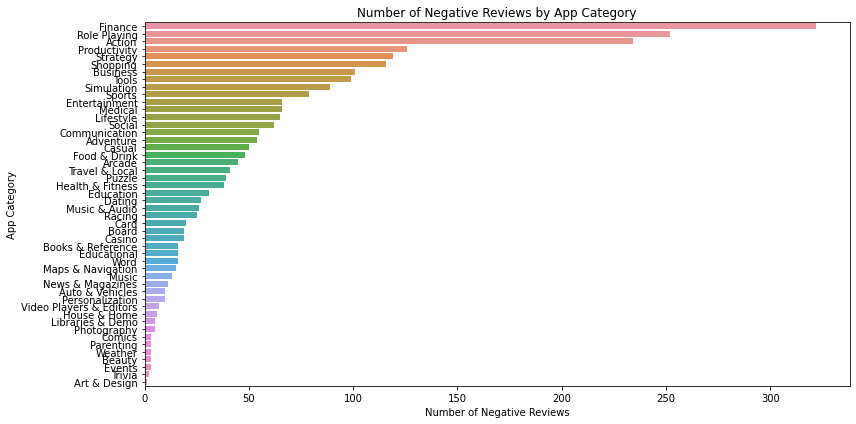

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(data=negative_reviews, y='app_category', order=negative_reviews['app_category'].value_counts().index)
plt.title('Number of Negative Reviews by App Category')
plt.xlabel('Number of Negative Reviews')
plt.ylabel('App Category')
plt.tight_layout()
plt.show()